# Aquisição de imagem

*Ultima modificação em em 2025-09-02*


## Importações

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

import utils as ut

## Codigo

### Leitura da imagem

In [2]:
IMG_PATH = Path("ying-yang.jpg")

image = cv.imread(str(IMG_PATH), cv.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError(f"Não consegui ler o arquivo: {IMG_PATH.resolve()}")

print("Imagem carregada com sucesso!")

Imagem carregada com sucesso!


### Análise exploratória

In [3]:
ut.eda_image(image)

Largura em pixels: 603
Altura em pixels: 612
Quantidade de pixels: 369036
Quantidade de elementos presentes na matriz: 1107108
Quantidade de canais: 3


## Tornando a imagem em escala de cinza
Agora, em vez de visualizar os canais separadamente (azul, verde e vermelho), vamos fundir a contribuição de todos eles em uma única intensidade de cinza.
* Criamos uma matriz 2D (altura × largura) chamada grayChannel, que armazena apenas um valor por pixel.
* Esse valor corresponde à média aritmética dos três canais (B, G, R).
* Ou seja, cada pixel deixa de ter 3 números (um para cada cor) e passa a ter apenas 1 número (0–255) representando sua tonalidade em cinza.

In [3]:
grayChannel = ut.generate_gray_channel(image)

cv.imshow("Imagem recriada", grayChannel)
cv.waitKey(0)

-1

### Histograma da imagem

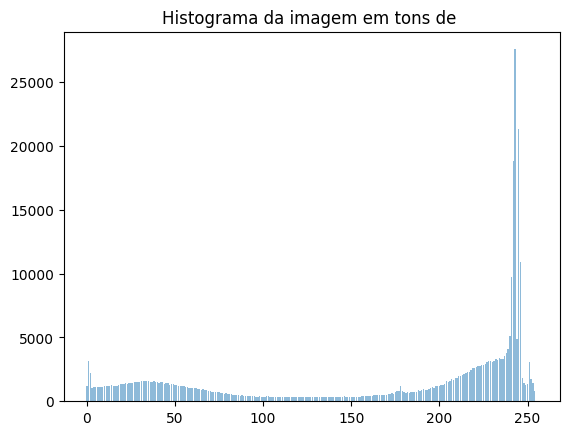

In [5]:
pixel = 256*[0]

for i in range(256):
    pixel[i] = i

plt.title(f'Histograma da imagem em tons de ')
plt.bar(pixel, ut.histograma(grayChannel), alpha=0.5,)
plt.show()

## Removendo limiar

In [4]:
grayCopy = grayChannel.copy()
whiteThreshold = ut.remove_threshold(grayCopy, 140, mode='above')

In [5]:
cv.imshow("Canal branco", whiteThreshold)
cv.waitKey(0)

KeyboardInterrupt: 

In [6]:
grayCopy = grayChannel.copy()
blackThreshold = ut.remove_threshold(grayCopy, 140, mode='below')

In [7]:
cv.imshow("Canal preto", blackThreshold)
cv.waitKey(0)

-1

## 3 limiares

In [8]:
IMG_PATH = Path("jamaica.png")

image = cv.imread(str(IMG_PATH), cv.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError(f"Não consegui ler o arquivo: {IMG_PATH.resolve()}")

print("Imagem carregada com sucesso!")

Imagem carregada com sucesso!


In [9]:
cv.imshow("Bandeira da jamaica", image)
cv.waitKey(0)

-1

In [11]:
grayChannel = ut.generate_gray_channel(image)

cv.imshow("Bandeira da jamaica cinza", grayChannel)
cv.waitKey(0)

-1

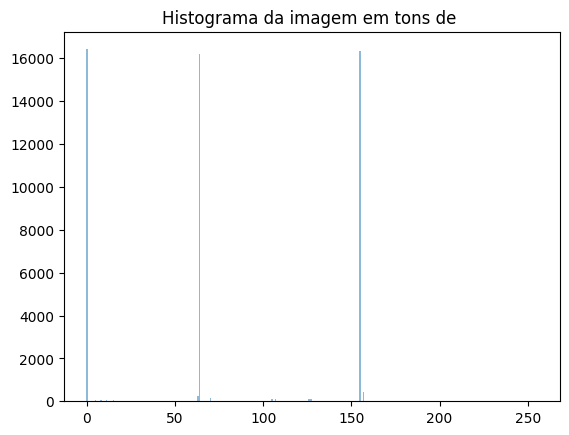

In [12]:
pixel = 256*[0]

for i in range(256):
    pixel[i] = i

plt.title(f'Histograma da imagem em tons de ')
plt.bar(pixel, ut.histograma(grayChannel), alpha=0.5,)
plt.show()

In [14]:
grayCopy = grayChannel.copy()
intervalThreshold = ut.remove_threshold(grayCopy, [(50, 100)])

In [15]:
cv.imshow("Removendo 2 limeares", intervalThreshold)
cv.waitKey(0)

-1